# Machine Learning

## Library

In [175]:
library( rpart )    # decision tree
library( titanic )  # titanic dataset
library( caTools )  # Y ratio split
library( tidyverse )
options(repr.plot.width =8 , repr.plot.height = 3.5, repr.plot.res = 150)

## Preprocessing

### Dealing with NA

#### Sample Data

In [176]:
x1 = c(1,2,3,4,NA,6,NA,8)
x2 = c('A','B','C',NA,'E','F',NA,NA)
my.df = data.frame(x1,x2)

#### Where are NAs (vector) ?
Use the logical vector from **is.na( )** for row selection

In [177]:
print( is.na(x1) )     # logical vector, NA elements will be TRUE
print( x1[!is.na(x1)])  # Use ! to reverse select for valid elements

[1] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
[1] 1 2 3 4 6 8


#### Where are NAs (dataframe) ?
Notice that is.na( ) scan through every cells in dataframe and return a matrix logial vector.  
We **can't directly tell diretly** which rows contain NAs

In [178]:
print( is.na(my.df) )     # logical vector, NA elements will be TRUE

        x1    x2
[1,] FALSE FALSE
[2,] FALSE FALSE
[3,] FALSE FALSE
[4,] FALSE  TRUE
[5,]  TRUE FALSE
[6,] FALSE FALSE
[7,]  TRUE  TRUE
[8,] FALSE  TRUE


Using **complete.cases( )** we can detect the rows without NAs (complete) in a returned logical vector.  
TO detect rows with NAs, use **! not**

In [179]:
my.df[!complete.cases(my.df), ]m

ERROR: Error in parse(text = x, srcfile = src): <text>:1:32: unexpected symbol
1: my.df[!complete.cases(my.df), ]m
                                   ^


#### Give Me Clean Data
Select Rows with **complete.cases**

In [180]:
my.df[complete.cases(my.df), ]

,x1,x2
1,1,A
2,2,B
3,3,C
6,6,F


A more elegant ways to filter clean data is **na.omit( )**

In [181]:
na.omit( my.df )

,x1,x2
1,1,A
2,2,B
3,3,C
6,6,F


### Splitting
#### Splitting by sample( ) 
This approach randomly picked row numbers without replacement.  
**It doesn't ensure the split ratio of of the imbalance labels**  
The result is a number vector with positions. Use **negate -** to reverse selection for test set

In [182]:
set.seed(1234)
n      = nrow(mtcars)   # total rows
ratio  = 0.7            # percentage for train split
split = sample( x = 1:n, size = ratio*n, replace = FALSE)
train = mtcars[  split, ]
test  = mtcars[ -split, ]

**Check Split Result by Row Numbers**

In [183]:
print( nrow(train) )
print( nrow(test)  )

[1] 22
[1] 10


#### Main Label (Y) Ratio
Split by sample.split( )
The result is a logical vector. Therefore, use **not !** to reverse selection for test set

In [184]:
split = sample.split(Y=titanic_train$Survived, SplitRatio = 0.7)  # randomly 0.7 set to TRUE, remaining FALSE
train = titanic_train[ split, ]
test  = titanic_train[!split, ]

In [185]:
print( nrow(train) )
print( nrow(test) )
prop.table( table(train$Survived))
prop.table( table(test$Survived))


[1] 623
[1] 268



        0         1 
0.6163724 0.3836276 


        0         1 
0.6156716 0.3843284 

### Scaling

#### Sample Data

In [186]:
x1 = 1:5
x2 = 11:15
num.df = data.frame(x1,x2)

In [187]:
print(num.df)

  x1 x2
1  1 11
2  2 12
3  3 13
4  4 14
5  5 15


#### minmax scaling
Use apply to loop through each column and return vector on each loop

In [188]:
apply( num.df, MARGIN=2,
      function(x) { x/(max(x)-min(x))}
)

x1,x2
0.25,2.75
0.50,3.00
0.75,3.25
1.00,3.50
1.25,3.75


#### Z-Score Scaling

In [189]:
scale( num.df )

x1,x2
-1.2649111,-1.2649111
-0.6324555,-0.6324555
0.0000000,0.0000000
0.6324555,0.6324555
1.2649111,1.2649111


## Clustering
### Sample Data
#### Generate Pseudo Data

In [190]:
set.seed(1234)
my.cluster.df = data.frame(
  id = paste('ID_', 1:18, sep = ''),
  grp = c(rep('G1', 6), rep('G2', 6), rep('G3', 6)),
  value1 = c( round(rnorm(6, mean = 10,  sd = 3)),
              round(rnorm(6, mean = 10, sd = 3)),
              round(rnorm(6, mean = 30, sd = 3))),
  value2 = c( round(rnorm(6, mean = 10, sd = 3)),
              round(rnorm(6, mean = 20, sd = 3)),
              round(rnorm(6, mean = 20, sd = 3))),
  stringsAsFactors = F
)
rownames(my.cluster.df) = my.cluster.df[,1]
head( my.cluster.df)

,id,grp,value1,value2
ID_1,ID_1,G1,6,7
ID_2,ID_2,G1,11,17
ID_3,ID_3,G1,13,10
ID_4,ID_4,G1,3,9
ID_5,ID_5,G1,11,9
ID_6,ID_6,G1,12,11


#### Sample 2D Plot

Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"

ERROR: Error in plot.window(...): need finite 'xlim' values


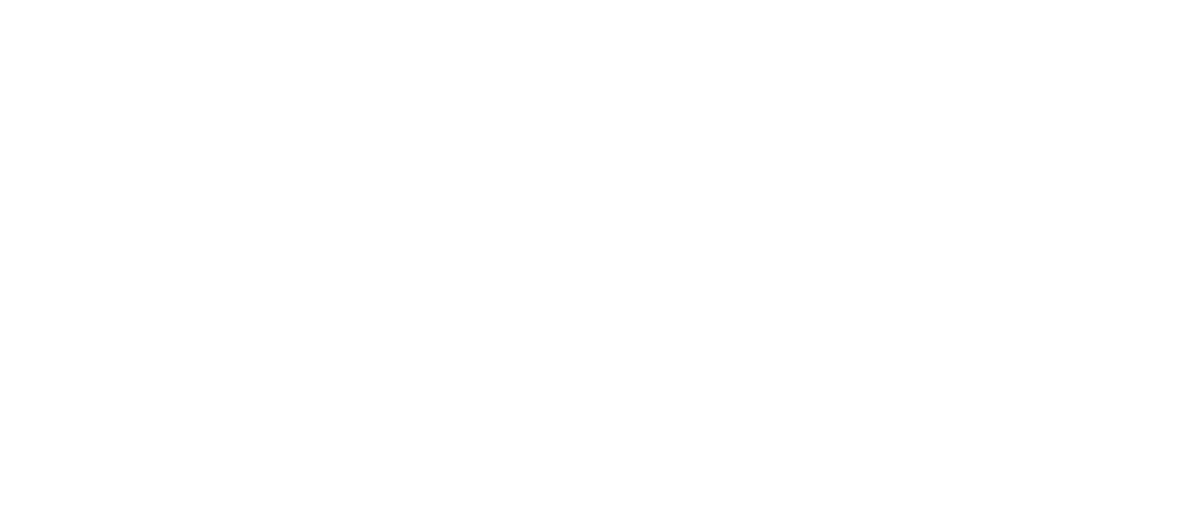

In [191]:
plot(my.df$value1, my.df$value2)

### H Clustering
#### Calculate Distance

In [192]:
d = dist(my.cluster.df[, 3:4], method = 'euclidean') ## default 'euclidean'

In [193]:
print(d)

           ID_1      ID_2      ID_3      ID_4      ID_5      ID_6      ID_7
ID_2  11.180340                                                            
ID_3   7.615773  7.280110                                                  
ID_4   3.605551 11.313708 10.049876                                        
ID_5   5.385165  8.000000  2.236068  8.000000                              
ID_6   7.211103  6.082763  1.414214  9.219544  2.236068                    
ID_7  11.180340  3.162278  9.433981 10.295630  9.486833  8.062258          
ID_8   9.219544  3.162278  7.810250  8.602325  7.615773  6.403124  2.000000
ID_9  15.132746  5.830952 13.000000 13.928388 13.341664 11.704700  4.000000
ID_10 10.049876  4.000000  9.219544  8.944272  8.944272  7.810250  1.414214
ID_11 13.341664  3.605551 10.770330 12.529964 11.180340  9.486833  2.236068
ID_12 10.049876  4.000000  9.219544  8.944272  8.944272  7.810250  1.414214
ID_13 27.202941 18.027756 19.849433 28.653098 22.022716 20.000000 20.615528
ID_14 26.832

#### Build Dendogram

In [194]:
dendogram = hclust(d, method = 'average')  ## method can also be 'complete','single','centroid'

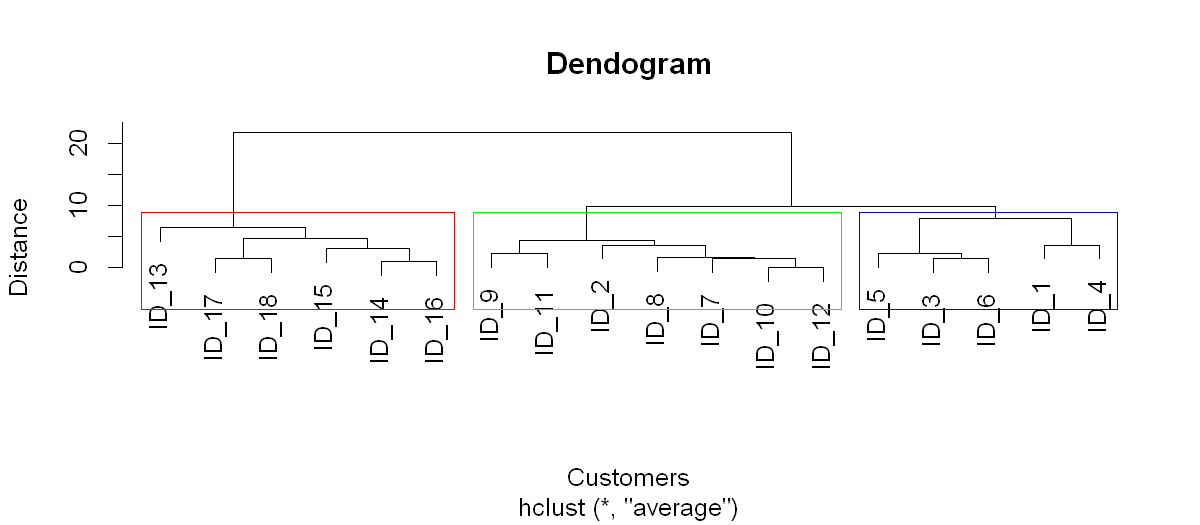

In [195]:
plot( dendogram, main='Dendogram', xlab='Customers', ylab='Distance' )
rect.hclust( dendogram, k=3, border=c('red','green','blue'))

In [196]:
clusters = cutree(dendogram, 3)
print(clusters)

 ID_1  ID_2  ID_3  ID_4  ID_5  ID_6  ID_7  ID_8  ID_9 ID_10 ID_11 ID_12 ID_13 
    1     2     1     1     1     1     2     2     2     2     2     2     3 
ID_14 ID_15 ID_16 ID_17 ID_18 
    3     3     3     3     3 


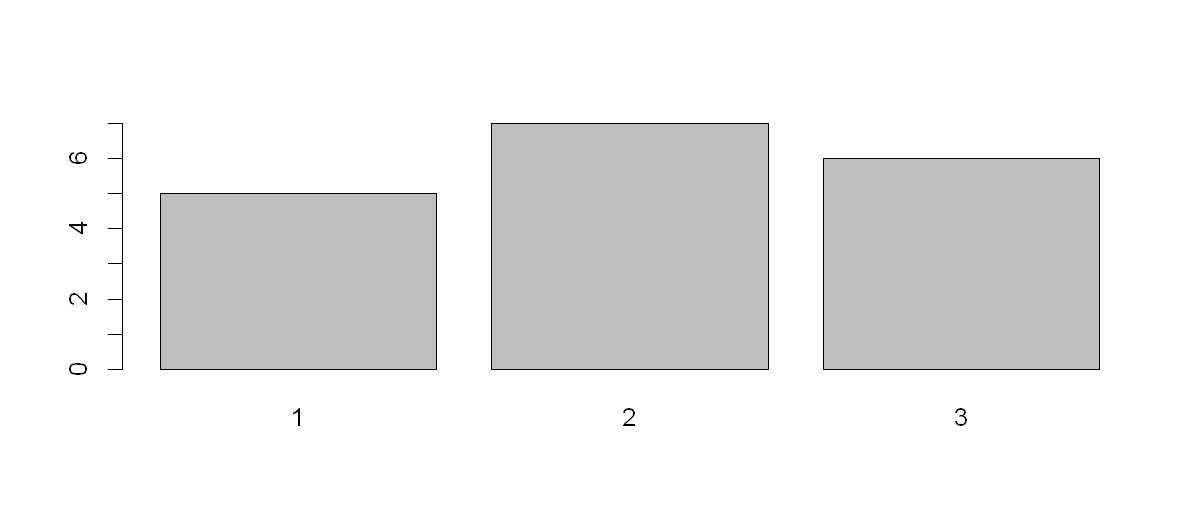

In [197]:
barplot( table(clusters))

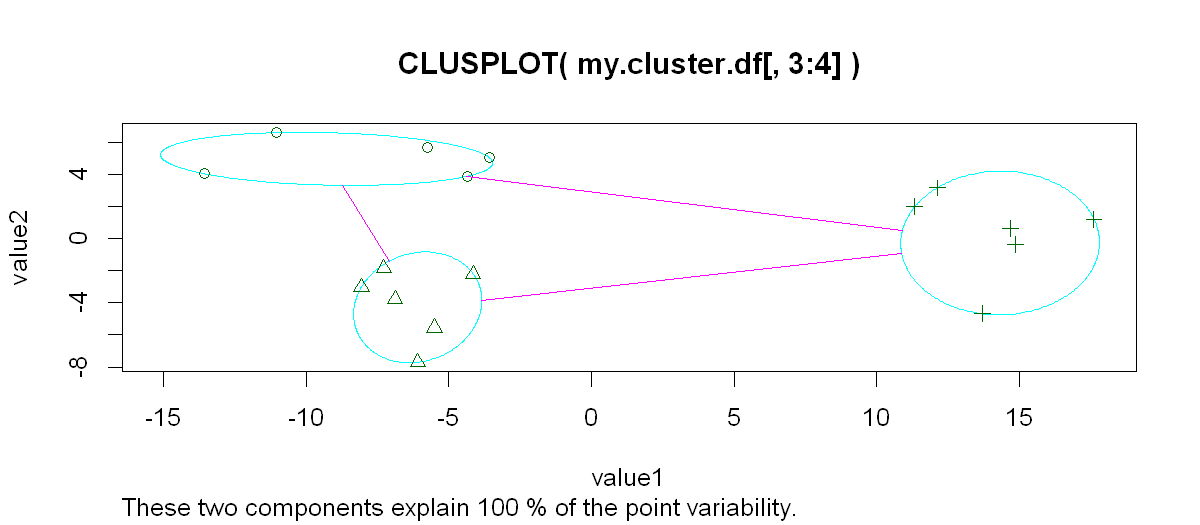

In [198]:
library(cluster)
clusplot(my.cluster.df[,3:4], clusters, xlab='value1', ylab='value2')

### Kmeans
#### Built Model

In [199]:
km.fit = kmeans(my.cluster.df[,3:4], centers = 3, nstart = 10)

#### Understanding Model

In [200]:
str(km.fit)

List of 9
 $ cluster     : Named int [1:18] 1 3 1 1 1 1 3 3 3 3 ...
  ..- attr(*, "names")= chr [1:18] "ID_1" "ID_2" "ID_3" "ID_4" ...
 $ centers     : num [1:3, 1:2] 9 29.33 8.29 9.2 18.17 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:2] "value1" "value2"
 $ totss       : num 2196
 $ withinss    : num [1:3] 82.8 62.2 38.3
 $ tot.withinss: num 183
 $ betweenss   : num 2013
 $ size        : int [1:3] 5 6 7
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [201]:
clusters = km.fit$cluster
print(clusters)

 ID_1  ID_2  ID_3  ID_4  ID_5  ID_6  ID_7  ID_8  ID_9 ID_10 ID_11 ID_12 ID_13 
    1     3     1     1     1     1     3     3     3     3     3     3     2 
ID_14 ID_15 ID_16 ID_17 ID_18 
    2     2     2     2     2 


#### Visualize

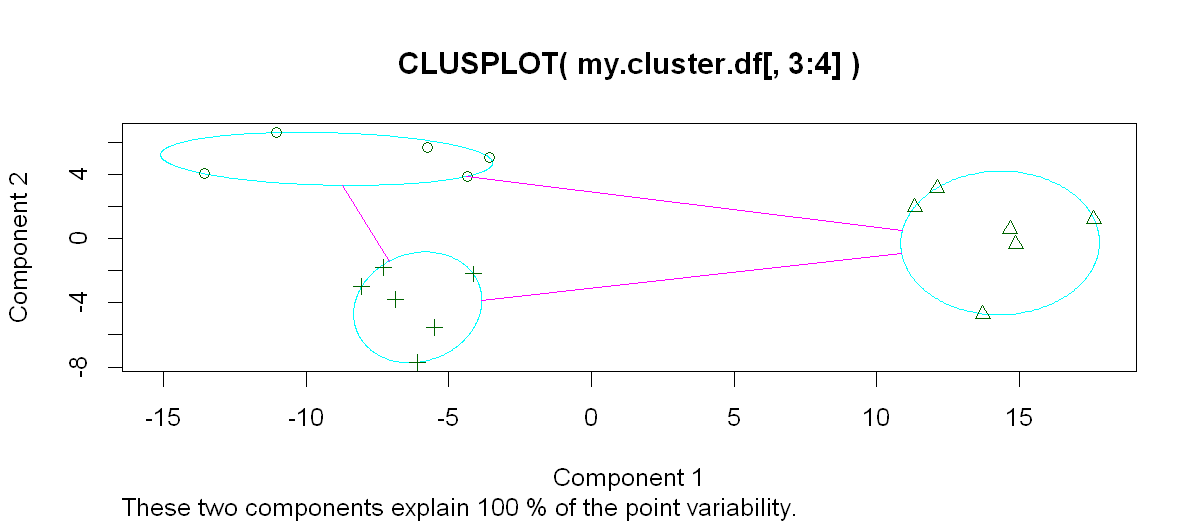

In [202]:
library(cluster)
clusplot(my.cluster.df[,3:4], clus = clusters)

#### Optimize
Making use of tot.withinss variable in the fit model, we can discover the cluster numbers associated to the minimum tot.withinss.

In [203]:
tot.withinss = rep(1:5,0)
for (i in 1:10) {
    temp.fit = kmeans(my.cluster.df[,c('value1','value2')], centers = i)
    tot.withinss[i] = temp.fit$tot.withinss
}
print(tot.withinss)

 [1] 2196.50000  418.00000  183.25238  160.26667  128.75238   56.45238
 [7]   46.75000   98.60000   17.50000   41.08333


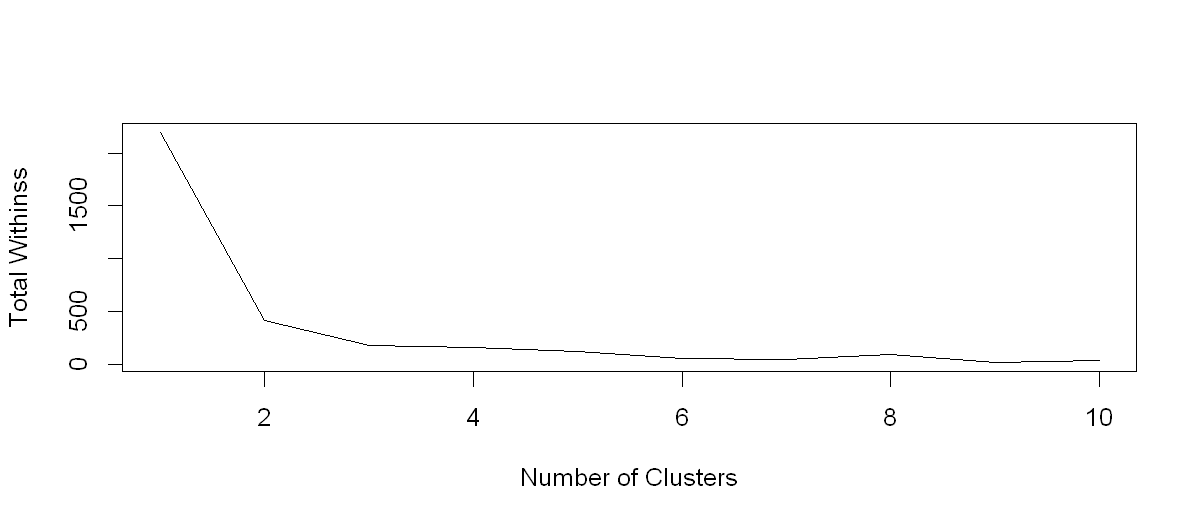

In [204]:
plot(1:10,tot.withinss,type='l', xlab='Number of Clusters', ylab='Total Withinss')

## Regression

### Linear Regression

#### The Data

In [205]:
head(train)
n = nrow(mtcars)
spl = sample(1:n, 0.7*n, replace = FALSE)
train = mtcars[spl,]
test  = mtcars[-spl,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


#### Build Model
Example below build single variable linear ergression

In [206]:
fit1 = lm(formula = mpg ~ hp,        data = train) 
fit2 = lm(formula = mpg ~ hp + disp, data=train)
fit3 = lm(formula = mpg ~ .,         data=train)

#### Understand The Model

In [207]:
summary(fit3)


Call:
lm(formula = mpg ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5960 -1.2876 -0.3228  1.2783  3.5948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -44.89663   31.34804  -1.432   0.1799  
cyl          -4.35412    2.26598  -1.922   0.0809 .
disp          0.00673    0.02090   0.322   0.7535  
hp            0.07145    0.04053   1.763   0.1057  
drat          3.68633    1.95669   1.884   0.0863 .
wt           -6.46964    2.46297  -2.627   0.0235 *
qsec          4.72964    1.66225   2.845   0.0159 *
vs          -17.26047    7.20284  -2.396   0.0355 *
am          -10.06142    5.91106  -1.702   0.1168  
gear          5.39295    2.95567   1.825   0.0953 .
carb         -1.11394    1.02531  -1.086   0.3005  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.548 on 11 degrees of freedom
Multiple R-squared:  0.9292,	Adjusted R-squared:  0.8649 
F-statistic: 14.45 on 10 and 11 DF,  p-val

In [208]:
str(fit1)

List of 12
 $ coefficients : Named num [1:2] 30.9652 -0.0707
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "hp"
 $ residuals    : Named num [1:22] -1.8624 -1.8449 -0.0115 -0.9449 1.1017 ...
  ..- attr(*, "names")= chr [1:22] "Volvo 142E" "Merc 450SE" "Chrysler Imperial" "Merc 450SL" ...
 $ effects      : Named num [1:22] -93.275 24.75 0.64 -0.492 1.535 ...
  ..- attr(*, "names")= chr [1:22] "(Intercept)" "hp" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:22] 23.3 18.2 14.7 18.2 18.6 ...
  ..- attr(*, "names")= chr [1:22] "Volvo 142E" "Merc 450SE" "Chrysler Imperial" "Merc 450SL" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:22, 1:2] -4.69 0.213 0.213 0.213 0.213 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:22] "Volvo 142E" "Merc 450SE" "Chrysler Imperial" "Merc 450SL" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "hp"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.21 1.09
  ..$ pivot: int [1:2]

#### Visualize The Model

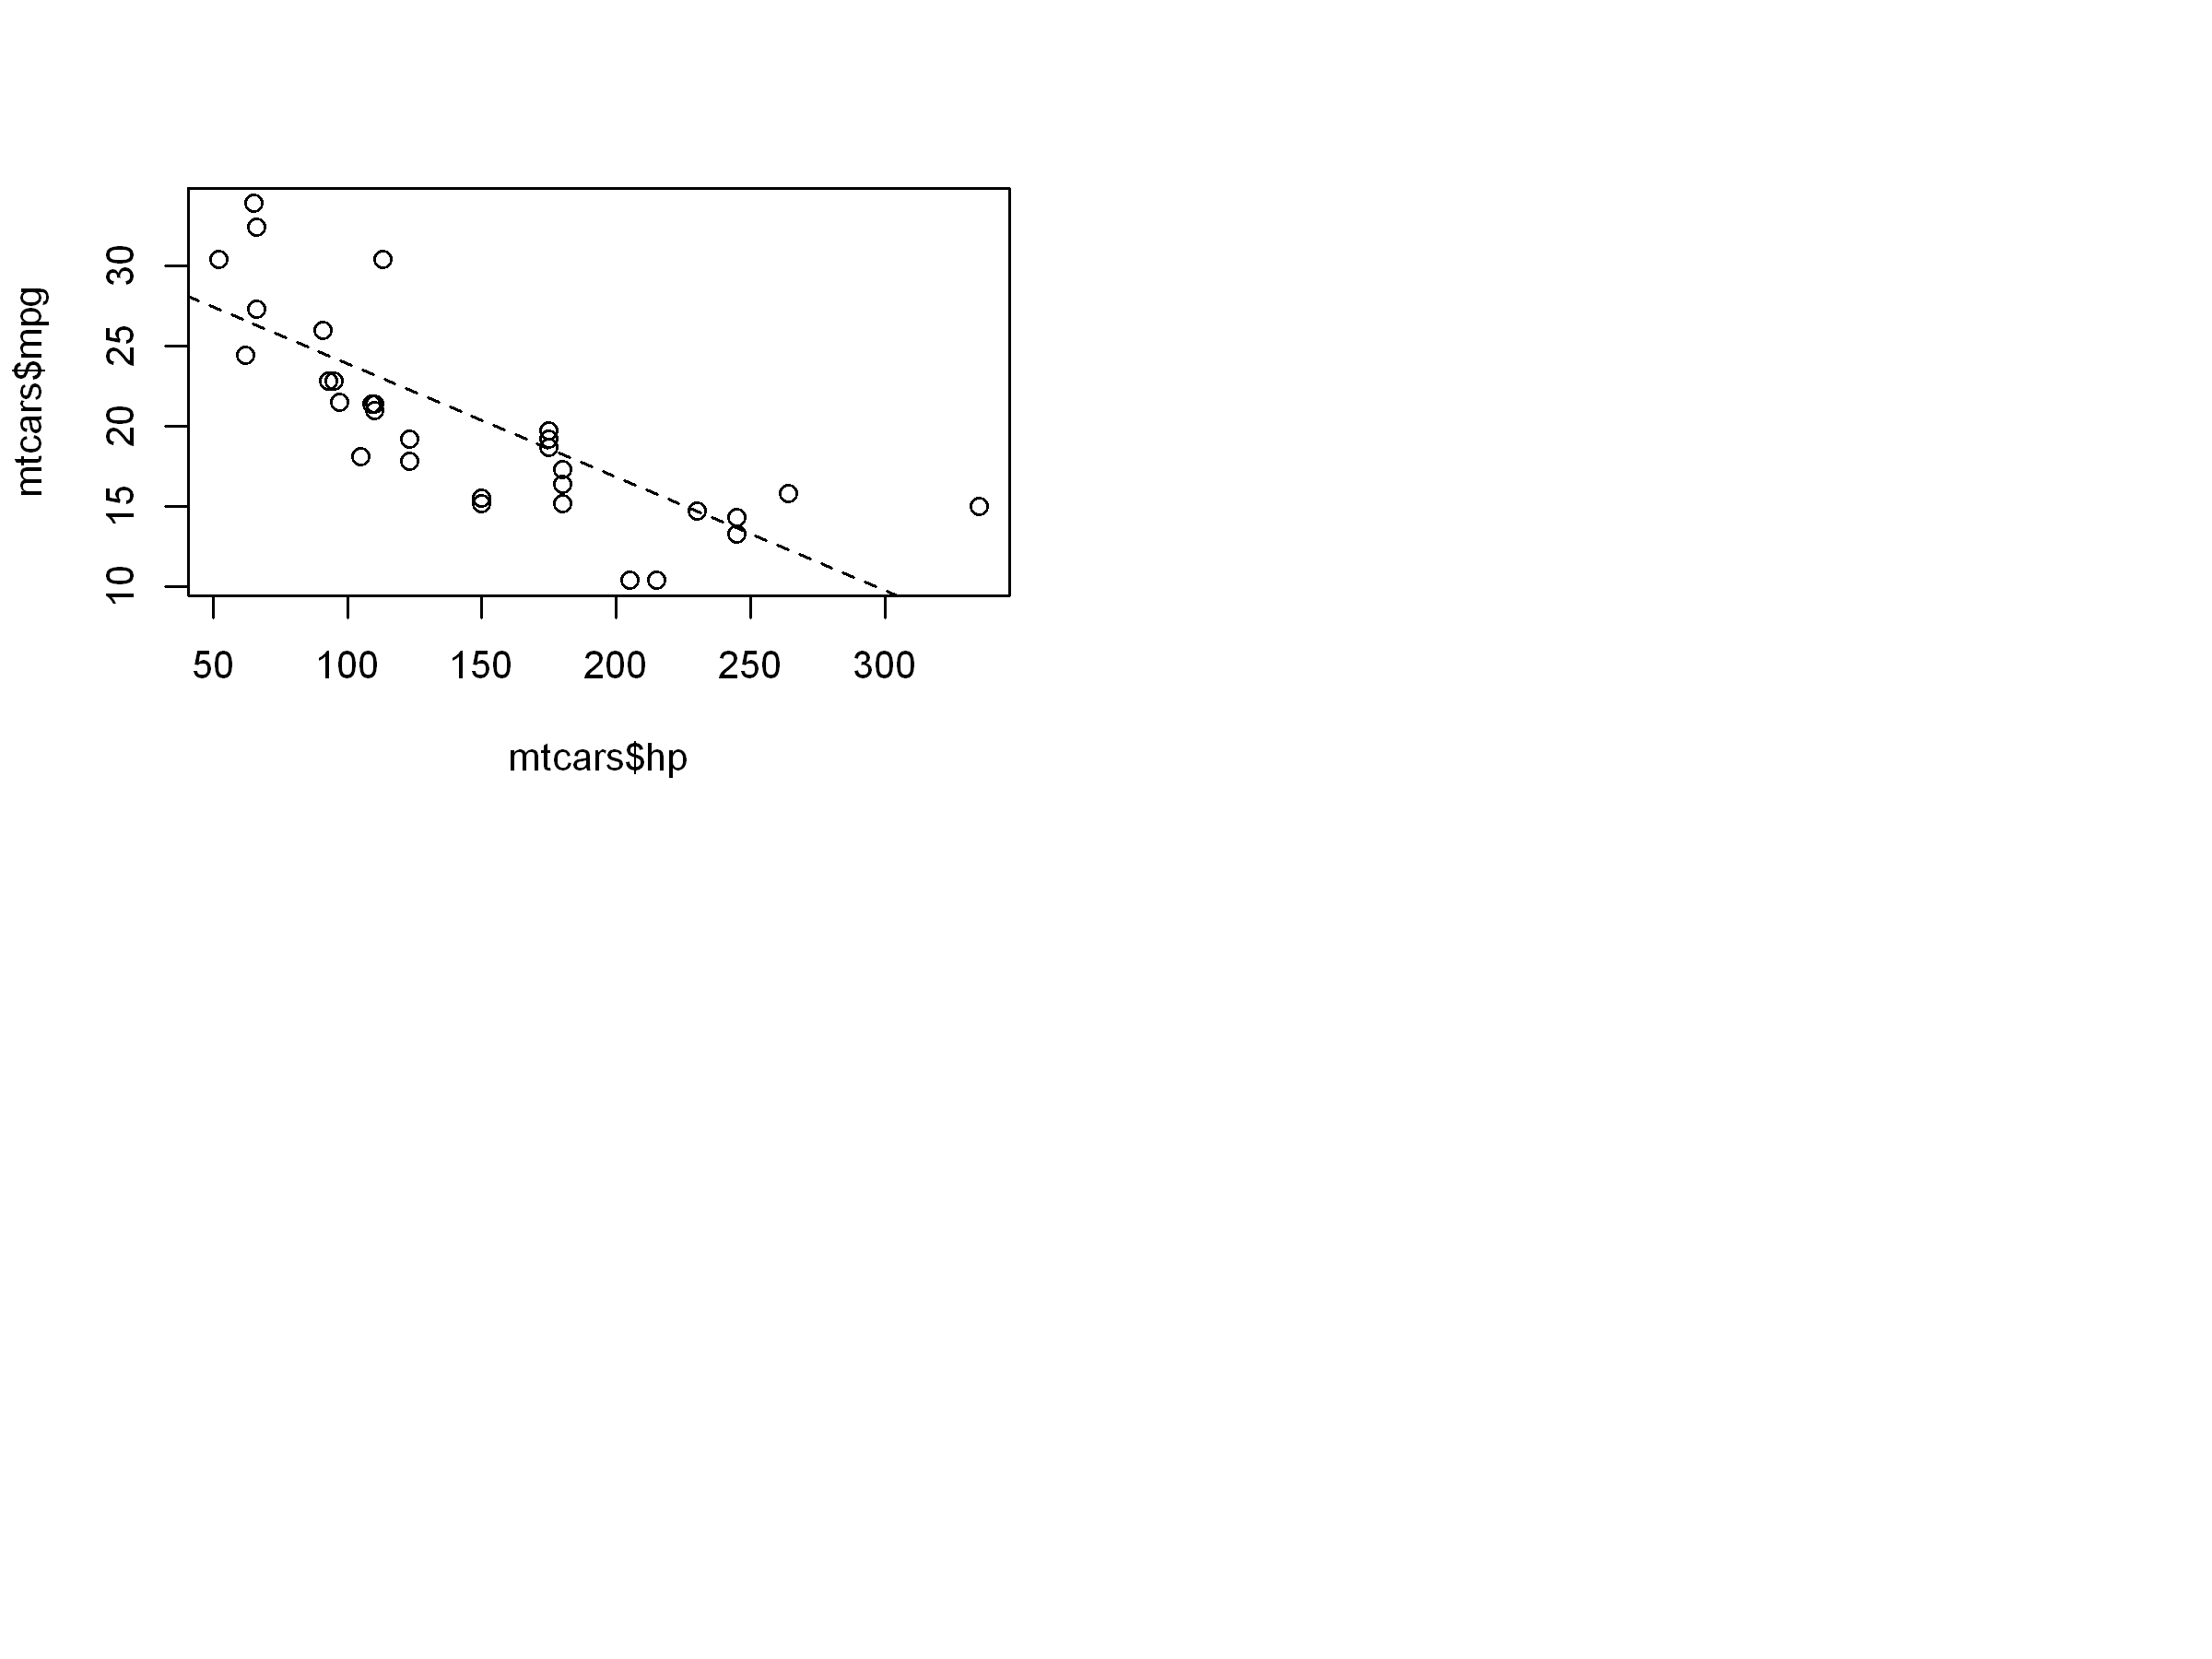

In [209]:
options(repr.plot.width =8 , repr.plot.height = 6, repr.plot.res = 300)
par(mfrow=c(2,2))

plot(mtcars$hp, mtcars$mpg)
abline(fit1, lty=2)

#### Prediction

In [210]:
predict(fit3, newdata = test)

Mazda RX4    Hornet 4 Drive Hornet Sportabout         Merc 240D 
         20.24568          18.87710          19.00277          32.74471 
         Merc 230       Merc 450SLC     Toyota Corona       AMC Javelin 
         49.88547          19.81990          35.56211          18.19628 
 Pontiac Firebird     Porsche 914-2 
         16.53560          41.14432

### Decision Tree

#### Build Model

In [211]:
library(rpart)

In [212]:
fit = rpart( formula = mpg ~ hp + disp, data=mtcars)

#### Understand The Model

In [213]:
summary( fit )

Call:
rpart(formula = mpg ~ hp + disp, data = mtcars)
  n= 32 

         CP nsplit rel error    xerror      xstd
1 0.6130502      0 1.0000000 1.0296909 0.2449305
2 0.0100000      1 0.3869498 0.5905776 0.1316344

Variable importance
disp   hp 
  56   44 

Node number 1: 32 observations,    complexity param=0.6130502
  mean=20.09062, MSE=35.18897 
  left son=2 (18 obs) right son=3 (14 obs)
  Primary splits:
      disp < 163.8 to the right, improve=0.6130502, (0 missing)
      hp   < 118   to the right, improve=0.6010712, (0 missing)
  Surrogate splits:
      hp < 118   to the right, agree=0.906, adj=0.786, (0 split)

Node number 2: 18 observations
  mean=15.99444, MSE=7.977191 

Node number 3: 14 observations
  mean=25.35714, MSE=20.86673 



In [214]:
str( fit )

List of 14
 $ frame              :'data.frame':	3 obs. of  8 variables:
  ..$ var       : Factor w/ 2 levels "<leaf>","disp": 2 1 1
  ..$ n         : int [1:3] 32 18 14
  ..$ wt        : num [1:3] 32 18 14
  ..$ dev       : num [1:3] 1126 144 292
  ..$ yval      : num [1:3] 20.1 16 25.4
  ..$ complexity: num [1:3] 0.613 0.01 0.01
  ..$ ncompete  : int [1:3] 1 0 0
  ..$ nsurrogate: int [1:3] 1 0 0
 $ where              : Named int [1:32] 3 3 3 2 2 2 2 3 3 2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ call               : language rpart(formula = mpg ~ hp + disp, data = mtcars)
 $ terms              :Classes 'terms', 'formula'  language mpg ~ hp + disp
  .. ..- attr(*, "variables")= language list(mpg, hp, disp)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "mpg" "hp" "disp"
  .. .. .. ..$ : chr [1:2] "hp" "disp"
  .. ..- attr(*, "term.labels")= chr [1

#### Visualize

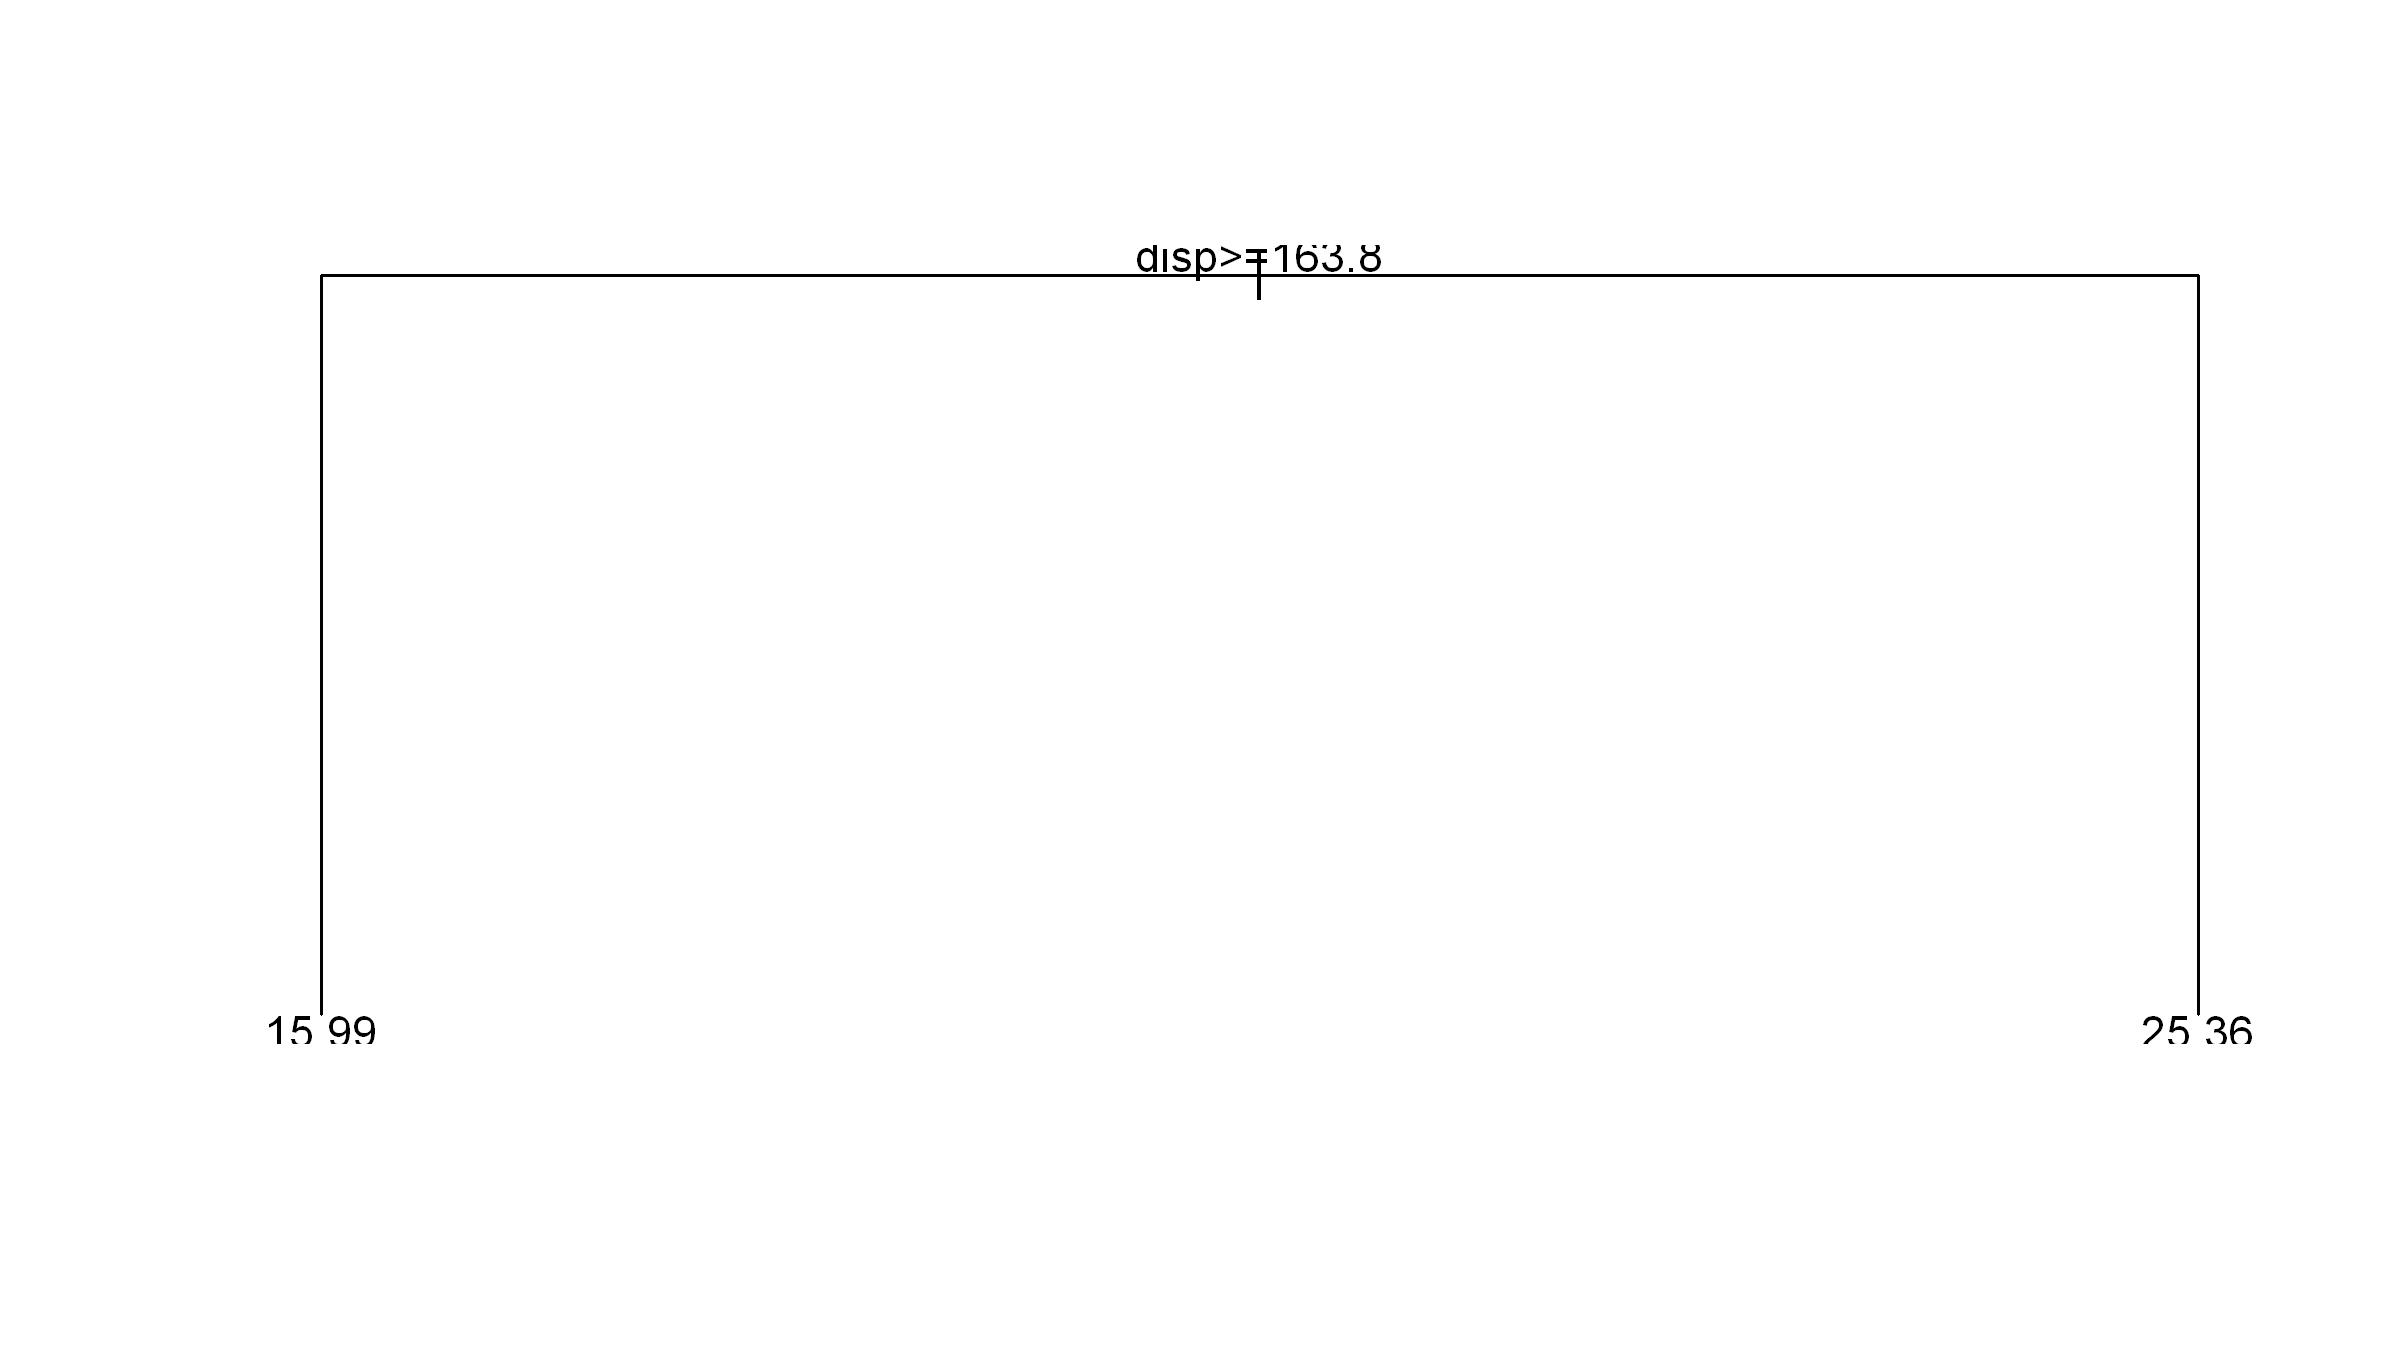

In [215]:
options(repr.plot.width =8 , repr.plot.height = 4.5, repr.plot.res = 300)
plot( fit )
text( fit, cex = .9)

In [216]:
str(as.vector(fit))

List of 14
 $ frame              :'data.frame':	3 obs. of  8 variables:
  ..$ var       : Factor w/ 2 levels "<leaf>","disp": 2 1 1
  ..$ n         : int [1:3] 32 18 14
  ..$ wt        : num [1:3] 32 18 14
  ..$ dev       : num [1:3] 1126 144 292
  ..$ yval      : num [1:3] 20.1 16 25.4
  ..$ complexity: num [1:3] 0.613 0.01 0.01
  ..$ ncompete  : int [1:3] 1 0 0
  ..$ nsurrogate: int [1:3] 1 0 0
 $ where              : Named int [1:32] 3 3 3 2 2 2 2 3 3 2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ call               : language rpart(formula = mpg ~ hp + disp, data = mtcars)
 $ terms              :Classes 'terms', 'formula'  language mpg ~ hp + disp
  .. ..- attr(*, "variables")= language list(mpg, hp, disp)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "mpg" "hp" "disp"
  .. .. .. ..$ : chr [1:2] "hp" "disp"
  .. ..- attr(*, "term.labels")= chr [1

## Classification

### Sample Dataset

In [217]:
set.seed(1234)
raw = read.csv('./data/hr.csv')
raw$left = as.factor(raw$left)

### Split Data
train.rows = sample( 1:nrow(raw), 0.7 * nrow(raw) )
train.data = raw[train.rows,]
test.data  = raw[-train.rows,]

In [218]:
glimpse(train.data)

Observations: 8,400
Variables: 7
$ S       <dbl> 0.41, 0.57, 0.83, 0.77, 0.64, 0.72, 0.90, 0.16, 0.34, 0.86,...
$ LPE     <dbl> 0.52, 0.42, 0.91, 0.96, 0.43, 0.89, 0.96, 0.97, 0.76, 0.74,...
$ NP      <int> 2, 2, 4, 3, 5, 4, 4, 6, 6, 2, 4, 3, 3, 5, 4, 4, 3, 5, 4, 4,...
$ ANH     <int> 147, 248, 210, 232, 269, 217, 258, 235, 237, 178, 185, 140,...
$ TIC     <int> 3, 4, 4, 2, 3, 3, 5, 3, 5, 3, 3, 3, 4, 4, 3, 2, 4, 3, 3, 3,...
$ Newborn <int> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,...
$ left    <fct> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...


### Logistic Regression

In [219]:
fit = glm( left ~ ., family = binomial, data=train.data )

In [220]:
str( fit )

List of 30
 $ coefficients     : Named num [1:7] -1.30962 -3.79675 0.56861 -0.35192 0.00366 ...
  ..- attr(*, "names")= chr [1:7] "(Intercept)" "S" "LPE" "NP" ...
 $ residuals        : Named num [1:8400] 3.39 -1.58 -1.12 -1.01 -1.09 ...
  ..- attr(*, "names")= chr [1:8400] "1365" "7467" "7311" "7479" ...
 $ fitted.values    : Named num [1:8400] 0.2949 0.3671 0.1095 0.0135 0.0828 ...
  ..- attr(*, "names")= chr [1:8400] "1365" "7467" "7311" "7479" ...
 $ effects          : Named num [1:8400] 37.61 25.34 -3.06 -4.84 -5.25 ...
  ..- attr(*, "names")= chr [1:8400] "(Intercept)" "S" "LPE" "NP" ...
 $ R                : num [1:7, 1:7] -30.1 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "(Intercept)" "S" "LPE" "NP" ...
  .. ..$ : chr [1:7] "(Intercept)" "S" "LPE" "NP" ...
 $ rank             : int 7
 $ qr               :List of 5
  ..$ qr   : num [1:8400, 1:7] -30.10652 0.01601 0.01037 0.00384 0.00915 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:8400]

In [221]:
pred = predict( fit, newdata=test.data, type='response')
summary( pred )

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001732 0.046016 0.103603 0.168153 0.237257 0.891413 

## Text Analysis
### Library

In [240]:
library( tm )
library( wordcloud )
#library(SnowballC)

Loading required package: RColorBrewer
Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

### Sample Data

In [223]:
text.df = read.csv('data/tweets.csv', stringsAsFactors=FALSE )
corpus1 = text.df$Tweet
print( head(corpus1))

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"
[2] "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple"                                         
[3] "LOVE U @APPLE"                                                                                        
[4] "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb"          
[5] ".@apple has the best customer service. In and out with a new phone in under 10min!"                   
[6] "@apple ear pods are AMAZING! Best sound from in-ear headphones I've ever had!"                        


In [224]:
str( corpus1 )

 chr [1:1181] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" ...


### Preprocessing
#### Convert To Lowercase

In [225]:
corpus2 = tolower( corpus1 )
head( corpus2 )

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"
[2] "ios 7 is so fricking smooth & beautiful!! #thanxapple @apple"                                         
[3] "love u @apple"                                                                                        
[4] "thank you @apple, loving my new iphone 5s!!!!!  #apple #iphone5s pic.twitter.com/xmhjcu4pcb"          
[5] ".@apple has the best customer service. in and out with a new phone in under 10min!"                   
[6] "@apple ear pods are amazing! best sound from in-ear headphones i've ever had!"

#### Remove Punctuation

In [226]:
corpus3 = removePunctuation(corpus2)
head( corpus3 )

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"
[2] "ios 7 is so fricking smooth  beautiful thanxapple apple"                                          
[3] "love u apple"                                                                                     
[4] "thank you apple loving my new iphone 5s  apple iphone5s pictwittercomxmhjcu4pcb"                  
[5] "apple has the best customer service in and out with a new phone in under 10min"                   
[6] "apple ear pods are amazing best sound from inear headphones ive ever had"

#### Strip Whitespace

In [227]:
corpus4 = stripWhitespace(corpus3)
head( corpus4 )

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"
[2] "ios 7 is so fricking smooth beautiful thanxapple apple"                                           
[3] "love u apple"                                                                                     
[4] "thank you apple loving my new iphone 5s apple iphone5s pictwittercomxmhjcu4pcb"                   
[5] "apple has the best customer service in and out with a new phone in under 10min"                   
[6] "apple ear pods are amazing best sound from inear headphones ive ever had"

#### Remove Stopwords

In [244]:
corpus5 = removeWords( corpus4, c('apple',stopwords('english')))
head( corpus5 )

[1] "   say    far  best customer care service   ever received  appstore"
[2] "ios 7   fricking smooth beautiful thanxapple "                      
[3] "love u "                                                            
[4] "thank   loving  new iphone 5s  iphone5s pictwittercomxmhjcu4pcb"    
[5] "   best customer service      new phone   10min"                    
[6] " ear pods  amazing best sound  inear headphones ive ever "

#### Stemming

In [245]:
corpus6 = stemDocument(corpus5)
head( corpus6 )

[1] "say far best custom care servic ever receiv appstor"    
[2] "io 7 frick smooth beauti thanxappl"                     
[3] "love u"                                                 
[4] "thank love new iphon 5s iphone5 pictwittercomxmhjcu4pcb"
[5] "best custom servic new phone 10min"                     
[6] "ear pod amaz best sound inear headphon ive ever"

#### Visualize

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

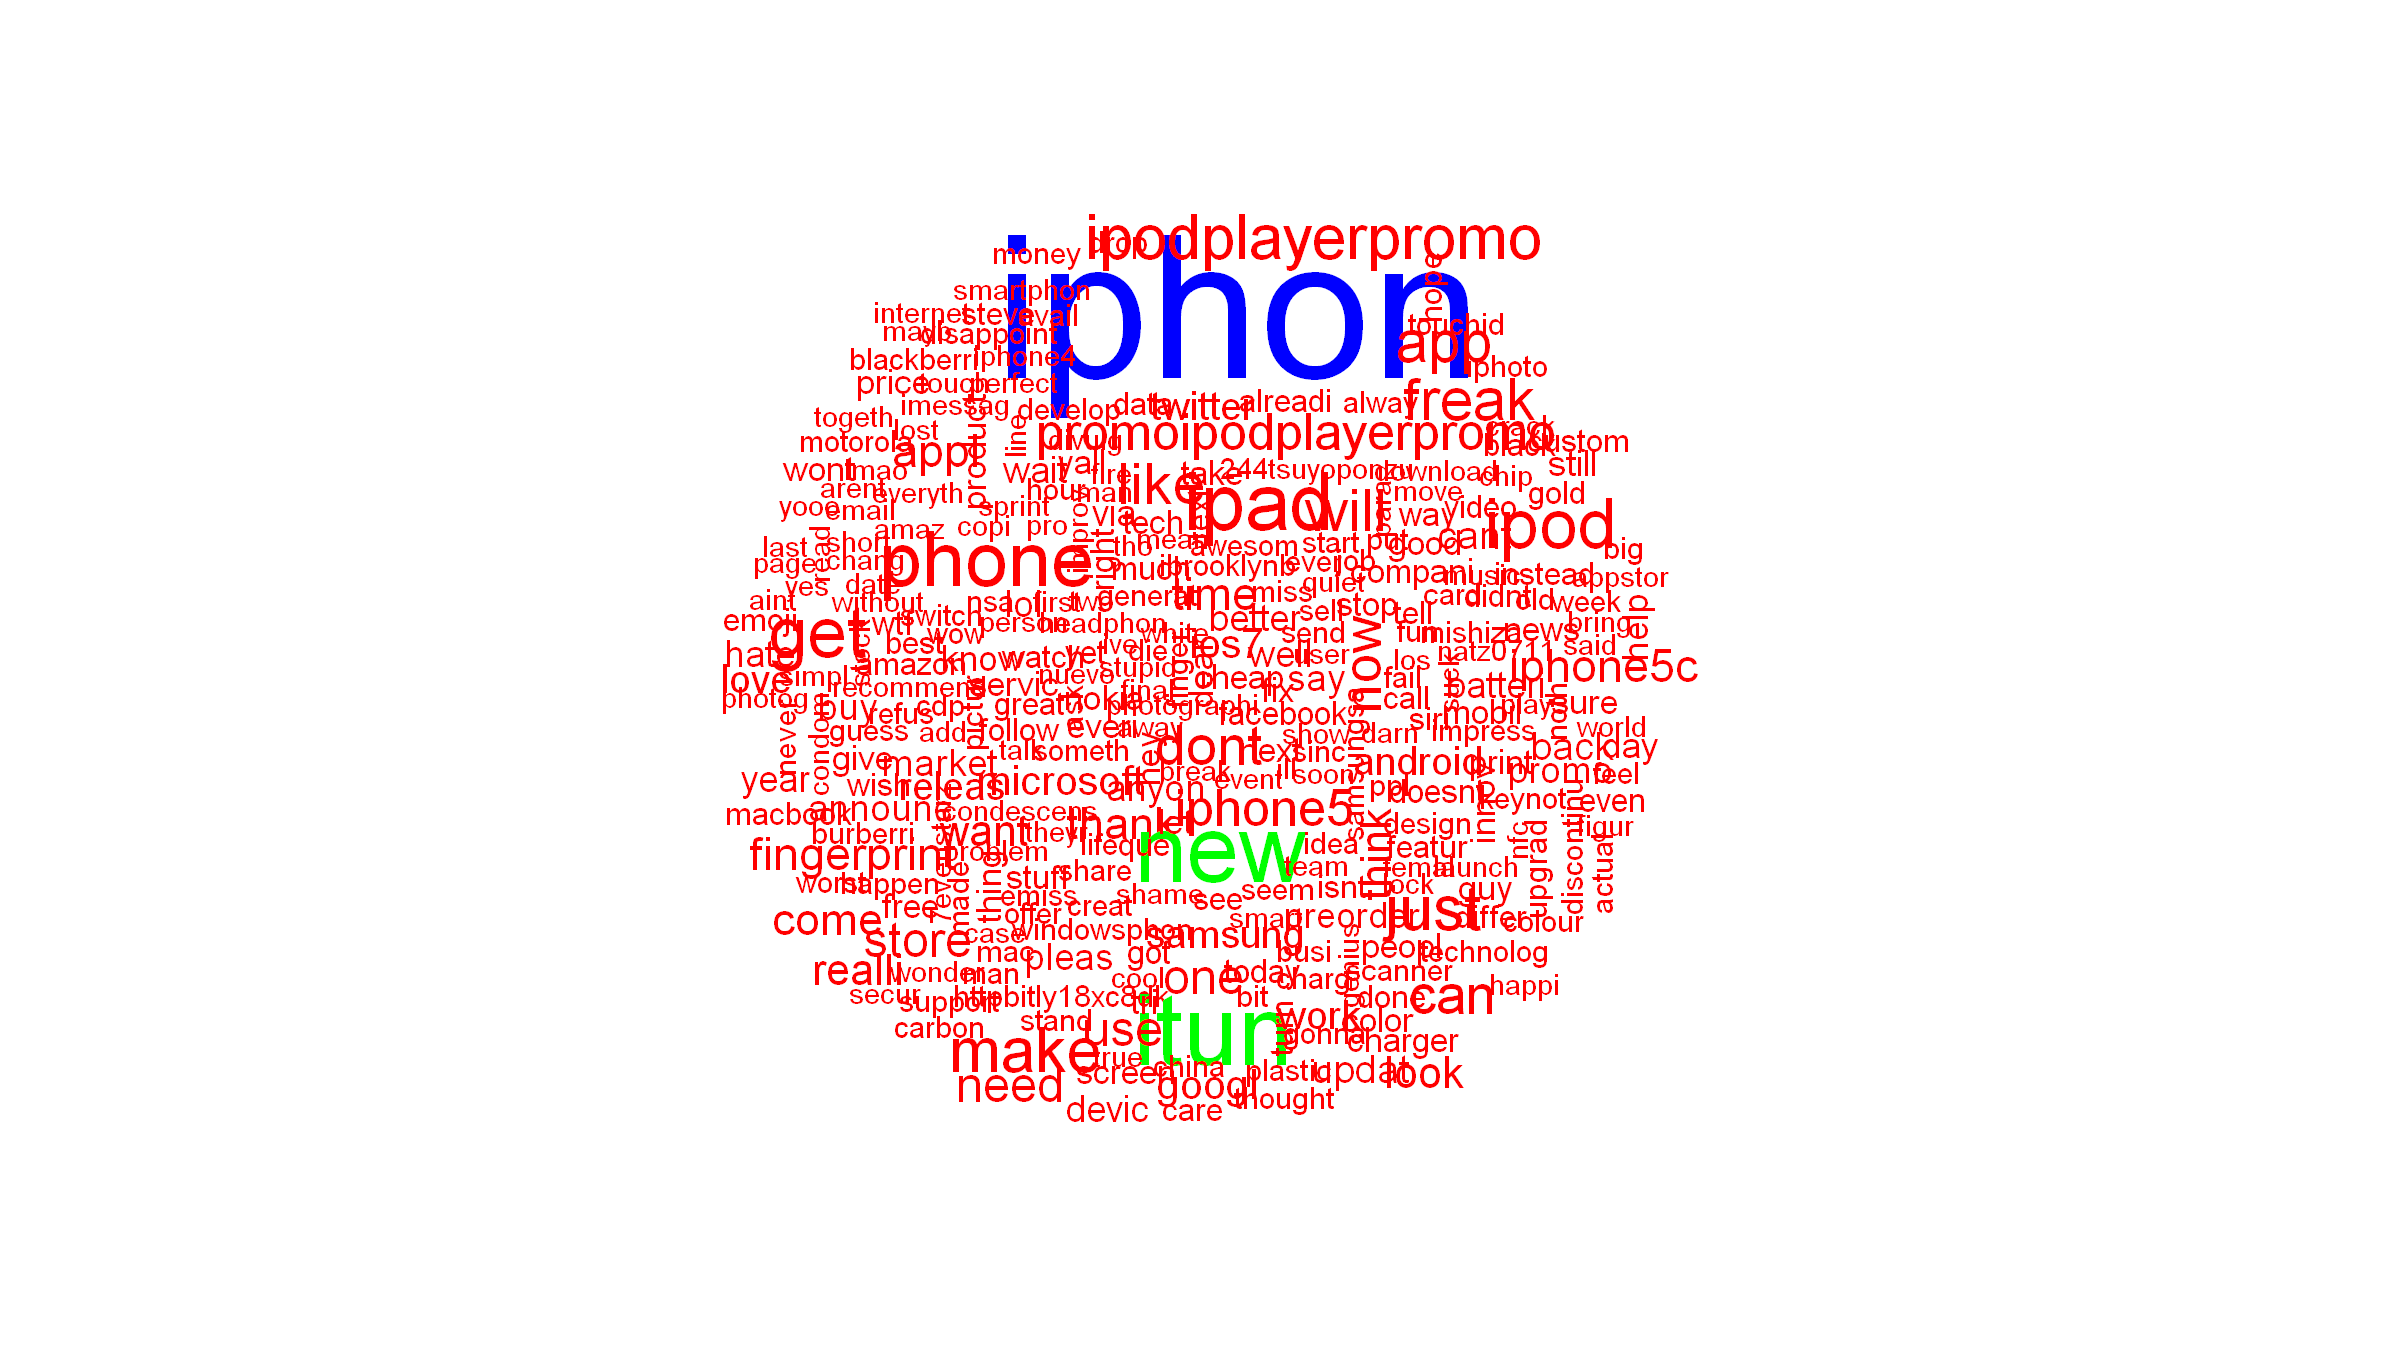

In [254]:
wordcloud(corpus6, color=rainbow(3),  min.freq = 6)

### Analysis

#### Document Term Matrix

In [266]:
tm.corpus = Corpus(VectorSource(corpus6))

In [261]:
tdm = TermDocumentMatrix( tm.corpus )
head( as.matrix(tdm) )

,1,2,3,4,5,6,7,8,9,10,...,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181
appstor,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
best,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
care,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
custom,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
far,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Term Document Matrix

In [ ]:
tm.corpus = Corpus(VectorSource(corpus6))

In [262]:
dtm = DocumentTermMatrix( tm.corpus )
head( as.matrix( dtm))

,appstor,best,care,custom,ever,far,receiv,say,servic,beauti,...,cheep,loos,nut,testicular,flame,freakappl,stabl,plz,telstra,agounalaki
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
